## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## 2. Import Dataset

In [2]:
df = pd.read_csv('data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


## 3. Data Exploration

In [4]:
df.shape

(669640, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(669639, 2)

### Conclusion -

- Original shape of dataset (669640, 2)
- Null Values - 1
- Dropped null value, so updated shape of dataset (669639, 2)

## 4. Exploratory Data Analysis

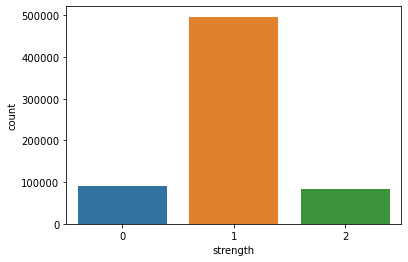

In [8]:
graph = sns.countplot(df['strength'])

In [9]:
def count(df, x):
    val = df[x].unique()
    perc = df[x].value_counts()
    details = {}
    for x in val:
        details[x] = round((perc[x]*100)/df.shape[0],2)
        print('{}: {}%'.format(x, details[x]))

print("Percentage of values with different strength levels -")
print("Here, 0 represents weakest and 2 represents strongest\n")
count(df,'strength')

Percentage of values with different strength levels -
Here, 0 represents weakest and 2 represents strongest

1: 74.19%
2: 12.42%
0: 13.4%


### Conclusion - 

- Majority Rows of this data have strength = 1 (i.e. Moderately Password)

In [10]:
df1 = df[df['strength']==2]
df1.reset_index(inplace = True, drop = True)
df1.head()

,password,strength
0,AVYq1lDE4MgAZfNt,2
1,WUt9IZzE0OQ7PkNE,2
2,elyass15@ajilent-ci,2
3,klara-tershina3H,2
4,pHyqueDIyNQ8vmhb,2


In [21]:
def pass_len(df):
    lengths = []
    for x in range(df.shape[0]):
        lengths.append(len(df['password'][x]))
        
    df['Pass Length']= lengths
    return df

In [24]:
df1 = pass_len(df1)
df1.head()

C:\Users\devan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,password,strength,Pass Length
0,AVYq1lDE4MgAZfNt,2,16
1,WUt9IZzE0OQ7PkNE,2,16
2,elyass15@ajilent-ci,2,19
3,klara-tershina3H,2,16
4,pHyqueDIyNQ8vmhb,2,16


In [25]:
df1.describe()

,strength,Pass Length
count,83137.0,83137.000000
mean,2.0,15.932497
std,0.0,2.020979
min,2.0,14.000000
25%,2.0,16.000000
50%,2.0,16.000000
75%,2.0,16.000000
max,2.0,220.000000


### Conclusion -

- Passwords with strength 2 have minimum length 14 and maximum length 220.
- This means that long passwords usually have higher strength

In [15]:
df2 = df[df['strength']==1]
df2.reset_index(inplace = True, drop = True)
df2.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [22]:
df2 = pass_len(df2)
df2.head()

C:\Users\devan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,password,strength,Pass Length
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11


In [23]:
df2.describe()

,strength,Pass Length
count,496801.0,496801.000000
mean,1.0,9.618964
std,0.0,1.343117
min,1.0,8.000000
25%,1.0,9.000000
50%,1.0,9.000000
75%,1.0,10.000000
max,1.0,13.000000


### Conclusion -

- Passwords with strength 1 have minimum length 8 and maximum length 13.
- This means that for a password to be not easily crackable, it needs to be minimum 8 characters long.
- This has been noticed that most of the websites also have this rule of password length to be of minimum 8 characters to be acceptable.

## 5. Data Preprocessing

In [28]:
# Separating the dependent and independent features
x = df.pop('password')
y = df

In [29]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [31]:
# Converting characters to features
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
x=vectorizer.fit_transform(x)

In [41]:
x.shape

(669639, 153)

In [34]:
vectorizer.vocabulary_

{'k': 66,
 'z': 81,
 'd': 59,
 'e': 60,
 '5': 39,
 '7': 41,
 'i': 64,
 'n': 69,
 'o': 70,
 '3': 37,
 '4': 38,
 'v': 77,
 's': 74,
 '1': 35,
 'y': 80,
 'r': 73,
 'm': 68,
 'g': 62,
 '2': 36,
 'l': 67,
 'a': 56,
 'b': 57,
 'h': 63,
 'q': 72,
 'f': 61,
 't': 75,
 'u': 76,
 '6': 40,
 'c': 58,
 '8': 42,
 'w': 78,
 '9': 43,
 '0': 34,
 'j': 65,
 'p': 71,
 '@': 49,
 '-': 31,
 'x': 79,
 '.': 32,
 '>': 47,
 '&': 26,
 '?': 48,
 '<': 45,
 '!': 21,
 ';': 44,
 '_': 54,
 '%': 25,
 '±': 99,
 '"': 22,
 '~': 85,
 '+': 30,
 '^': 53,
 '/': 33,
 '$': 24,
 ')': 28,
 ' ': 20,
 '(': 27,
 '#': 23,
 'ú': 138,
 '*': 29,
 '`': 55,
 '{': 82,
 '}': 84,
 '[': 50,
 ']': 52,
 'þ': 142,
 'ó': 132,
 'ô': 133,
 '=': 46,
 '\\': 51,
 '\x1c': 17,
 '³': 101,
 '¿': 112,
 '\x16': 12,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 '\x19': 15,
 '\x05': 3,
 '\x1b': 16,
 'å': 120,
 '‚': 147,
 'ä': 119,
 'à': 115,
 'õ': 134,
 'ß': 114,
 '´': 102,
 '«': 96,
 'ð': 129,
 'â': 117,
 '°': 98,
 '|': 83,
 '\x7f': 86,
 '²': 100,
 '¾': 111,
 'ÿ': 143,

In [36]:
# Let's have a look how these vectors look like
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=x[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591303
5,0.566899
z,0.335926
k,0.292247
d,0.285631
...,...
\,0.000000
],0.000000
^,0.000000
_,0.000000


## 6. Train Test Split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [50]:
Y_test.shape

(133928, 1)

## 7. Model Training

In [51]:
###multinomial
logreg = LogisticRegression(random_state=0, multi_class = 'multinomial', solver = 'newton-cg')
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

In [52]:
print(logreg.score(X_test, y_pred))

1.0


In [55]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
y_pred = XGB.predict(X_test)

[20:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
print(XGB.score(X_test, y_pred))

1.0


## All Done! Let's predict strength of passwords

In [59]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
XGB.predict(pred)

array([2], dtype=int64)

In [60]:
dt=np.array(['abcd'])
pred=vectorizer.transform(dt)
XGB.predict(pred)

array([0], dtype=int64)

In [61]:
dt=np.array(['devanshi1304'])
pred=vectorizer.transform(dt)
XGB.predict(pred)

array([1], dtype=int64)